In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/darwins-finches-evolution-dataset/fortis_beak_depth_heredity.csv
/kaggle/input/darwins-finches-evolution-dataset/finch_beaks_2012.csv
/kaggle/input/darwins-finches-evolution-dataset/finch_beaks_1975.csv
/kaggle/input/darwins-finches-evolution-dataset/scandens_beak_depth_heredity.csv


## Darwin’s finches,
named after Charles Darwin, are small land birds, 17 of which are endemic to the Galapagos Islands. The 18th finch is the Cocos finch which is found on Cocos Island, Costa Rica. They are not true finches – they actually belong to the tanager family. It is thought that their ancestor, and closest known relative, is the dull-coloured grassquit, which is found on mainland South America. 

Once the original grassquits arrived in Galapagos, they diversified and adapted to the different environments found on the Islands, eventually becoming different species. They famously evolved to have different beaks which are suited to different food types such as large seeds and invertebrates, allowing them to occupy different niches. 

Darwin’s finches are all very similar in shape, size and colour, but there are a few differences which can help when identifying them. These include diet, habitat, and beak size and shape.
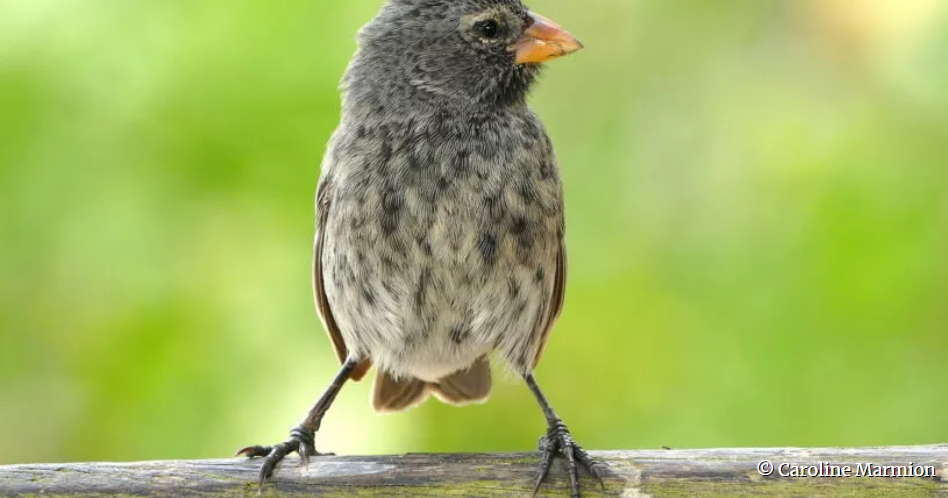


Common cactus finch (Geospiza **scandens**). Least Concern. As their name suggests, they feed mostly on Opuntia cacti. When the Opuntia are in flower, the finches feed almost exclusively on pollen and nectar. During other times of the year, they will feed on Opuntia seeds and fruit. They will also feed on a range of other vegetative foods and invertebrates.  

Medium ground finch (Geospiza **fortis**). Least Concern. These finches are found on a number of the Islands and feed mainly on seeds. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF


sns.set()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Importing data
fb_2012 = pd.read_csv('/kaggle/input/darwins-finches-evolution-dataset/finch_beaks_2012.csv')
fb_1975 = pd.read_csv('/kaggle/input/darwins-finches-evolution-dataset/finch_beaks_1975.csv')

## Data Cleaning/Assesment

In [4]:

fb_2012.head(247)

,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2
...,...,...,...,...
242,21292,scandens,13.2,8.4
243,21295,scandens,14.2,9.3
244,21297,scandens,13.0,9.8
245,21340,scandens,14.6,8.9


In [5]:
fb_2012.describe()

,band,blength,bdepth
count,248.000000,248.000000,248.000000
mean,20119.641129,12.004315,8.902823
std,844.713528,1.642203,0.757521
min,19022.000000,9.000000,7.200000
25%,19436.750000,10.475000,8.300000
50%,19817.500000,12.300000,8.900000
75%,21135.250000,13.425000,9.400000
max,22000.000000,15.200000,11.100000


In [6]:
fb_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   band     248 non-null    int64  
 1   species  248 non-null    object 
 2   blength  248 non-null    float64
 3   bdepth   248 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.9+ KB


In [7]:
fb_1975.head(403)

,band,species,"Beak length, mm","Beak depth, mm"
0,2,fortis,9.40,8.00
1,9,fortis,9.20,8.30
2,12,fortis,9.50,7.50
3,15,fortis,9.50,8.00
4,305,fortis,11.50,9.90
...,...,...,...,...
398,20225,scandens,14.55,9.45
399,20252,scandens,14.05,9.05
400,20255,scandens,14.45,8.75
401,20266,scandens,15.05,9.45


In [8]:
fb_1975.describe()

,band,"Beak length, mm","Beak depth, mm"
count,403.000000,403.000000,403.000000
mean,1873.183623,11.332804,9.125955
std,4584.953069,1.619126,0.708737
min,2.000000,8.700000,7.500000
25%,458.500000,10.200000,8.600000
50%,671.000000,10.900000,9.100000
75%,899.500000,11.740000,9.700000
max,20298.000000,15.940000,10.980000


In [9]:
fb_1975.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   band             403 non-null    int64  
 1   species          403 non-null    object 
 2   Beak length, mm  403 non-null    float64
 3   Beak depth, mm   403 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 12.7+ KB


In [10]:
# Adding year to columns
fb_1975['year'] = 1975
fb_2012['year'] = 2012

In [11]:
# Renaming Columns
fb_2012.columns = fb_1975.columns

# Combining DataFrame
fb = pd.concat([fb_2012, fb_1975])

## How the beak depth (the distance, top to bottom, of a closed beak) of the finch species scandens has changed over time. 

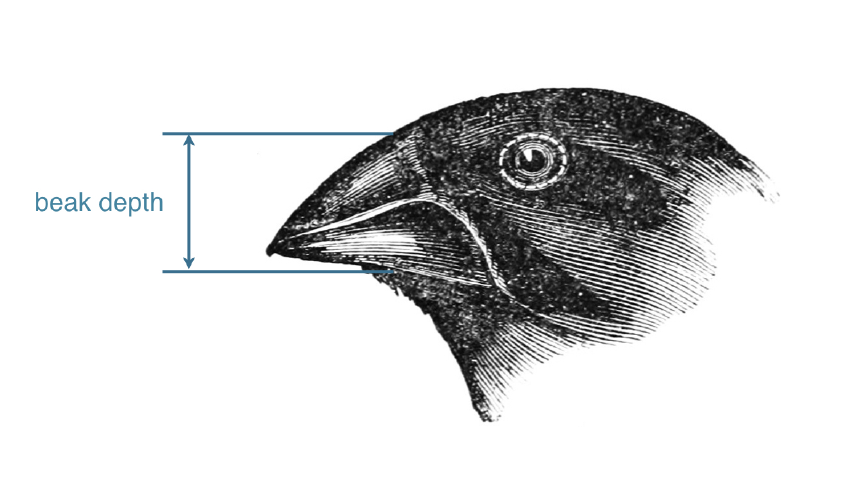

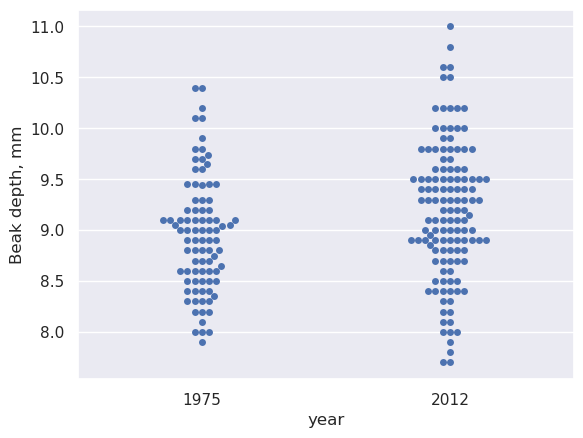

In [12]:
# Filtering Scandens
fb_scandens = fb[fb['species'] == 'scandens']

# Create bee swarm plot
sns.swarmplot(data=fb_scandens, x= 'year', y='Beak depth, mm')

# Label the axes
plt.xlabel('year')
plt.ylabel('Beak depth, mm')

# Show the plot
plt.show()

there is a clear difference between the 1975 and 2012 data set. Eyeballing it, it appears as though the mean of the 2012 data set might be slightly higher, and it might have a bigger variance.

In [13]:
#ECDF function
def ecdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

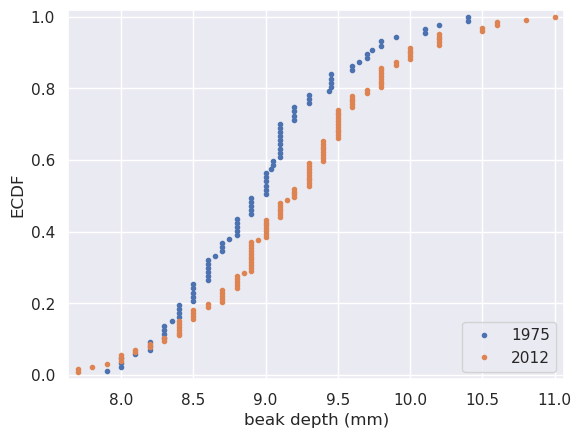

In [14]:
#ECDF function
def ecdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

# Filtering data
scandens_bd1975 = fb_scandens['Beak depth, mm'][fb_scandens['year'] == 1975]
scandens_bd2012 = fb_scandens['Beak depth, mm'][fb_scandens['year'] == 2012]

# Compute ECDFs
x_1975, y_1975 = ecdf(scandens_bd1975)
x_2012, y_2012 = ecdf(scandens_bd2012)

# Plot the ECDFs
plt.plot(x_1975, y_1975, marker='.', linestyle='none')
plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
plt.xlabel('beak depth (mm)')
plt.ylabel('ECDF')
plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()


The differences are much clearer in the ECDF. The mean is larger in the 2012 data, and the variance does appear larger as well.

## Parameter estimates of beak depths
Estimate the difference of the mean beak depth of the scandens samples from 1975 and 2012 and report a 95% confidence interval.

In [15]:
# Compute the difference of the sample means: mean_diff
mean_bd_2012 = scandens_bd2012.mean()
mean_bd_1975 = scandens_bd1975.mean()
mean_diff = mean_bd_2012 - mean_bd_1975 

# bootstrapping replicates of means
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
    return bs_replicates


# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(scandens_bd1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(scandens_bd2012, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.quantile(bs_diff_replicates, [0.025, 0.975])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.05899527 0.39061813] mm


## Hypothesis test: Are beaks deeper in 2012?

ECDF and determination of the confidence interval make it pretty clear that the beaks of scandens on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

The hypothesis we are testing is not that the beak depths come from the same distribution. For that we could use a permutation test. **The hypothesis is that the means are equal.** To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

In [16]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((scandens_bd1975,scandens_bd2012)))

# Shift the samples
bd_1975_shifted = scandens_bd1975 - np.mean(scandens_bd1975) + combined_mean 
bd_2012_shifted = scandens_bd2012 - np.mean(scandens_bd2012) + combined_mean 

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

p = 0.0037


In [17]:
print(combined_mean)
print(np.mean(scandens_bd1975))
print(np.mean(scandens_bd2012))
print(bd_1975_shifted.mean())
print(bd_2012_shifted.mean())

9.094252336448596
8.959999999999999
9.186220472440946
9.094252336448594
9.094252336448594


We get a p-value of 0.0041, which suggests that there is a statistically significant difference. it is very important to know how different they are! difference of 0.2 mm between the means. combine this with the statistical significance. Changing by 0.2 mm in 37 years is substantial by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years.

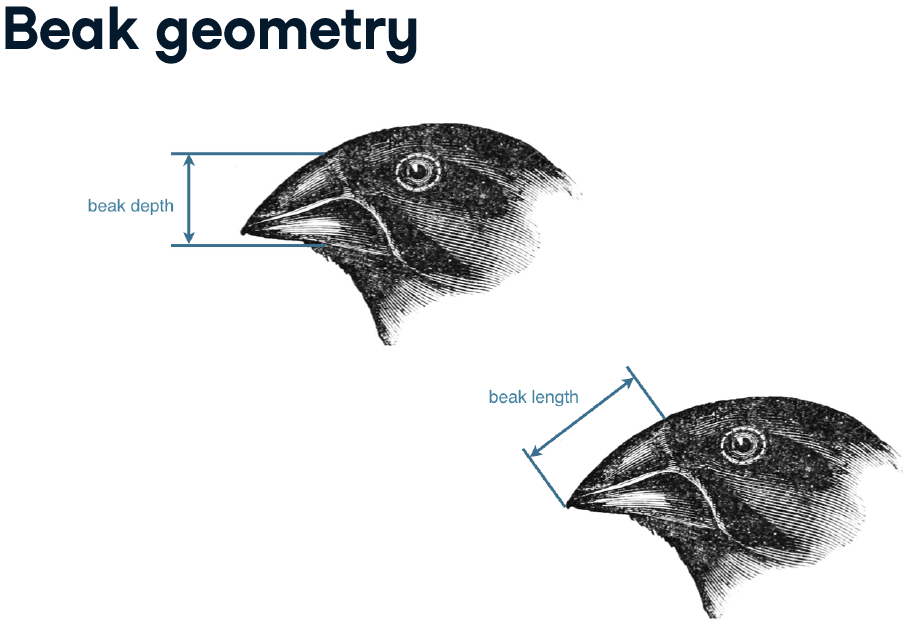

if the beak has the same shape; it just gets bigger. But if the beak length and beak depth change differently, the shape of the beak changes. we will investigate how beak length and depth change together.

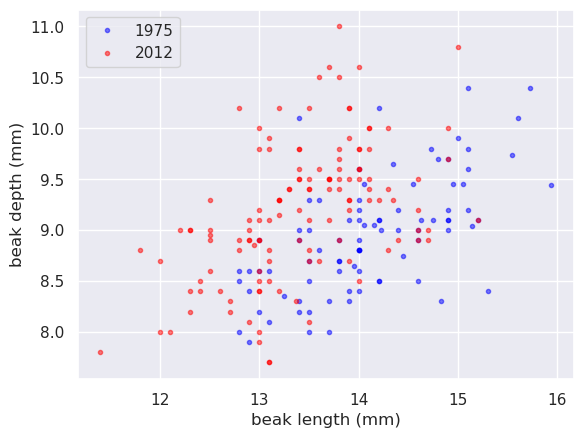

In [18]:
scandens_bl1975 = np.array(fb_scandens['Beak length, mm'][fb_scandens['year'] == 1975])
scandens_bd1975 = np.array(fb_scandens['Beak depth, mm'][fb_scandens['year'] == 1975])
scandens_bl2012 = np.array(fb_scandens['Beak length, mm'][fb_scandens['year'] == 2012])
scandens_bd2012 = np.array(fb_scandens['Beak depth, mm'][fb_scandens['year'] == 2012])

# Make scatter plot of 1975 data
plt.plot(scandens_bl1975, scandens_bd1975, marker='.',
        linestyle='None', color='blue',alpha=0.5)

# Make scatter plot of 2012 data
plt.plot(scandens_bl2012, scandens_bd2012, marker='.',
        linestyle='None', color='red',alpha=0.5)

# Label axes and make legend
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

In looking at the plot, we see that beaks got deeper (the red points are higher up in the y-direction), but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.

In [19]:
# Function to do pairs bootstrap
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

In [20]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(scandens_bl1975, scandens_bd1975, 1)
slope_2012, intercept_2012 = np.polyfit(scandens_bl2012, scandens_bd2012, 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(scandens_bl1975, scandens_bd1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(scandens_bl2012, scandens_bd2012, 1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])

# Print the results
print('1975: slope =', slope_1975,'confidence interval =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,'confidence interval =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,'confidence interval =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,'confidence interval =', intercept_conf_int_2012)

1975: slope = 0.4652051691605937 confidence interval = [0.32974186 0.59406377]
1975: intercept = 2.3908752365842263 confidence interval = [0.59592438 4.28297091]
2012: slope = 0.462630358835313 confidence interval = [0.32278882 0.5856436 ]
2012: intercept = 2.977247498236019 confidence interval = [1.30134341 4.87260466]


It looks like they have the same slope, but different intercepts.

## Displaying the linear regression results

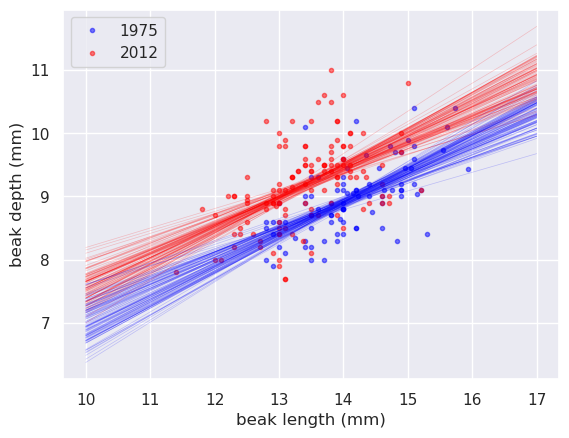

In [21]:
# Make scatter plot of 1975 data
plt.plot(scandens_bl1975, scandens_bd1975, marker='.', linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
plt.plot(scandens_bl2012, scandens_bd2012, marker='.', linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

plt.show()

linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. However, if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth.

In [22]:
# Compute length-to-depth ratios
geo_ratio1975 = scandens_bl1975 / scandens_bd1975
geo_ratio2012 = scandens_bl2012 / scandens_bd2012

# Compute means
mean_ratio_1975 = np.mean(geo_ratio1975)
mean_ratio_2012 = np.mean(geo_ratio2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(geo_ratio1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(geo_ratio2012, np.mean, 10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012,[0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975, 'confidence interval =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012, 'confidence interval =', conf_int_2012)
print('diff_in_geometry = ',mean_ratio_1975-mean_ratio_2012)
print('percent_change = ', (mean_ratio_1975-mean_ratio_2012) / mean_ratio_1975)

1975: mean ratio = 1.5788823771858533 confidence interval = [1.55680095 1.60065311]
2012: mean ratio = 1.4658342276847767 confidence interval = [1.44459378 1.48730244]
diff_in_geometry =  0.11304814950107667
percent_change =  0.07160010849102634


mean beak length-to-depth ratio decreased by .11 or 7.16% and even the confidence interval doesnt overlap to each other, this is a real change in beak geometry.

## Calculation of heritability
we need to know how strongly parental traits are passed on to offspring. investigate the extent to which parental beak depth is inherited by offspring in both scandens and fortis.

https://en.wikipedia.org/wiki/Heritability

In [23]:
# Import Data
scandens_bdher = pd.read_csv('/kaggle/input/darwins-finches-evolution-dataset/scandens_beak_depth_heredity.csv')
fortis_bdher = pd.read_csv('/kaggle/input/darwins-finches-evolution-dataset/fortis_beak_depth_heredity.csv')


# fortis_bdher seperate by Male and Female parent will just take the average BD
fortis_bdher['parent_meanBD'] = fortis_bdher[['Male BD', 'Female BD']].mean(axis =1)
fortis_bdher

,Mid-offspr,Male BD,Female BD,parent_meanBD
0,10.70,10.90,9.3,10.100
1,9.78,10.70,8.4,9.550
2,9.48,10.70,8.1,9.400
3,9.60,10.70,9.8,10.250
4,10.27,9.85,10.4,10.125
...,...,...,...,...
408,7.70,7.40,9.0,8.200
409,7.90,7.40,8.3,7.850
410,9.50,8.85,8.7,8.775
411,8.20,9.30,7.7,8.500


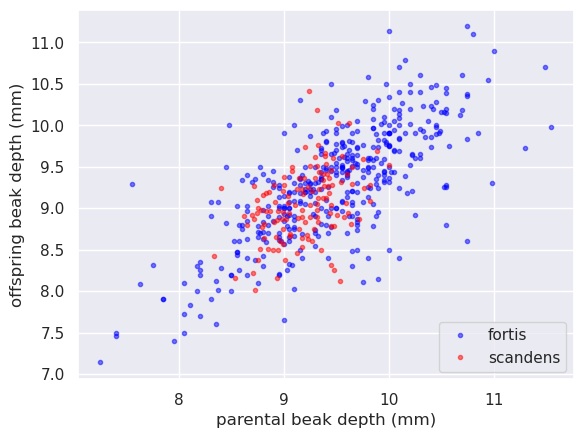

In [24]:
# Make scatter plots
plt.plot(fortis_bdher['parent_meanBD'], fortis_bdher['Mid-offspr'],
             marker='.', linestyle='none', color='blue', alpha=0.5)
plt.plot(scandens_bdher['mid_parent'], scandens_bdher['mid_offspring'],
             marker='.', linestyle='none', color='red', alpha=0.5)

# Label axes
plt.xlabel('parental beak depth (mm)')
plt.ylabel('offspring beak depth (mm)')

# Add legend
plt.legend(('fortis', 'scandens'), loc='lower right')

# Show plot
plt.show()

It appears as though there is a stronger correlation in fortis than in scandens. This suggests that beak depth is more strongly inherited in fortis. We'll quantify this correlation next.

In [25]:
#performs pairs bootstrap and computes a single statistic on pairs samples defined. 
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates


# Define func that takes in two arrays and returns the Pearson correlation coefficient.
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]



## Pearson correlation of offspring and parental data

In [26]:
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(scandens_bdher['mid_parent'], scandens_bdher['mid_offspring'])
r_fortis = pearson_r(fortis_bdher['parent_meanBD'], fortis_bdher['Mid-offspr'])

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(scandens_bdher['mid_parent'], scandens_bdher['mid_offspring'], pearson_r, 1000)

bs_replicates_fortis = draw_bs_pairs(fortis_bdher['parent_meanBD'], fortis_bdher['Mid-offspr'], pearson_r, 1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])

# Print results
print('scandens:', r_scandens, conf_int_scandens)
print('fortis:', r_fortis, conf_int_fortis)

scandens: 0.4117063629401258 [0.27061586 0.54288758]
fortis: 0.7283412395518487 [0.66593654 0.78132627]


It is clear from the confidence intervals that beak depth of the offspring of fortis parents is more strongly correlated with their offspring than their scandens counterparts.

## Measuring heritability

Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. This is a measure of the correlation between parents and offspring, but might not be the best estimate of heritability. If we stop and think, it makes more sense to define heritability as the ratio of the covariance between parent and offspring to the variance of the parents alone. 

In [27]:
# Function computes heritability defined as the ratio of the covariance of the trait in parents and offspring divided by the variance of the trait in the parents""".

def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

# Compute the heritability
heritability_scandens = heritability(scandens_bdher['mid_parent'], scandens_bdher['mid_offspring'])
heritability_fortis = heritability(fortis_bdher['parent_meanBD'], fortis_bdher['Mid-offspr'])

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(scandens_bdher['mid_parent'], scandens_bdher['mid_offspring'], heritability, size=1000)
replicates_fortis = draw_bs_pairs(fortis_bdher['parent_meanBD'], fortis_bdher['Mid-offspr'], heritability, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('scandens:', heritability_scandens, conf_int_scandens)
print('fortis:', heritability_fortis, conf_int_fortis)


scandens: 0.5485340868685982 [0.35997027 0.74158595]
fortis: 0.7229051911438159 [0.64643301 0.79797759]


Here again, we see that fortis has stronger heritability than scandens.

## Is beak depth heritable at all in G. scandens?
The heritability of beak depth in scandens seems low. It could be that this observed heritability was just achieved by chance and beak depth is actually not really heritable in the species. 

In [28]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(scandens_bdher['mid_parent'])
    perm_replicates[i] = heritability(bd_parent_permuted, scandens_bdher['mid_offspring'])


# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)

p-val = 0.0


p-value of zero, which means that none of the 10,000 permutation pairs replicates drew had a heritability high enough to match that which was observed. This strongly suggests that beak depth is heritable in scandens, just not as much as in fortis. 

## SUMMARY:

1.) There is a clear difference between the 1975 and 2012 beak depth of scanden. It appears as though the mean of the 2012 data set might be slightly higher, and it might have a bigger variance. Also we get a p-value of 0.0041, which suggests that there is a statistically significant difference. Difference of 0.2 mm between the means measured 37 years apart. which suggest that beak depth of scandeds changing by 0.2 mm in 37 years. If it kept changing at that rate, the beak depth would double in only 400 years.

2.) the plot shows, we see that beaks got deeper (the red points are higher up in the y-direction), but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape, because the slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, mean beak length-to-depth ratio decreased by .11 or 7.16%. the birds gained about half a millimeter in depth in both years. 

3.) Fortis has stronger heritability than scandens. p-value of zero, which means that none of the 10,000 permutation pairs replicates drew had a heritability high enough to match that which was observed. This strongly suggests that beak depth is heritable in scandens, just not as much as in fortis.

